In [1]:
import numpy as np
from mnist_reader import *
from matplotlib import pyplot
%matplotlib inline

First import the MNIST dataset from training and testing splits

In [2]:
X_train, y_train = load_mnist(dataset='training')
X_test, y_test = load_mnist(dataset='testing')

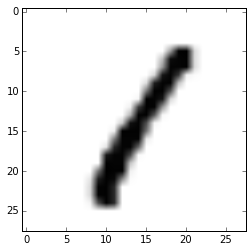

In [3]:
pyplot.imshow(X_train[3],cmap='Greys')

Flatten the dataset

In [4]:
X_train = X_train.reshape([len(X_train),28*28])
X_test = X_test.reshape([len(X_test),28*28])

Convert the testing dataset to binary output

In [5]:
from keras.utils import np_utils

ImportError: No module named keras.utils

In [ ]:
y_train = np_utils.to_categorical(y_train)

Creat a 3 layer MLP with the following:

    Input -- 784 8-bit uint vector
    
    Input-L1 : fully connected
    
    L1 -- 128 node layer with sigmoid activation
    
    L1 - L2 : fully connected
    
    L2 : 128 node layer with simgoid activation
    
    L2 - Output : fully connected
    
    Output : 10 node layer output


In [ ]:
input_num = X_train.shape[1]
output_num = y_train.shape[1]
layers = [input_num,64,64,64,64,output_num]

Set up the layers

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
model = Sequential()
for ix,i in enumerate(layers):
    if(ix <len(layers)-1):
        model.add(Dense(i,layers[ix+1]))
        model.add(Activation('sigmoid'))

model.compile(loss='mse',optimizer='rmsprop')

Training Step

In [ ]:
model.fit(X_train, y_train, nb_epoch=10, batch_size=64, validation_split=0.1, show_accuracy=True, verbose=2)

In [ ]:
preds = model.predict_classes(X_test)

In [ ]:
from sklearn import metrics
y_test = np.squeeze(y_test)
metrics.confusion_matrix(y_test,preds)

In [ ]:
model.